In [1]:
import numpy as np
import pandas as pd
import scipy as sci 

In [3]:
data = pd.read_csv('titanic_train_kaggle.csv')
data.head()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [4]:

from sklearn.preprocessing import StandardScaler
pd.set_option('display.max_rows', 714)
data = pd.DataFrame(data[[
    'Survived',
    'Sex',
    'Age',
    'Fare'
]])
data = data.dropna()

scaler = StandardScaler()
age = data['Age'].values.reshape(-1,1)
data['Age'] = scaler.fit_transform(age)

fare = data['Fare'].values.reshape(-1,1)
data['Fare'] = scaler.fit_transform(fare)

data['Sex'] = data['Sex'].map({'female':0,'male':1}).astype(int)

data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 4 columns):
Survived    714 non-null int64
Sex         714 non-null int32
Age         714 non-null float64
Fare        714 non-null float64
dtypes: float64(2), int32(1), int64(1)
memory usage: 25.1 KB


In [5]:
def sigmoid(x):
    return (1/(1 + np.exp(-x)))

              
def sig_der(x):
    return (sigmoid(x) * (1 - sigmoid(x)))

In [6]:




learning_rate = .01

inputs = data.loc[:,['Sex','Age','Fare']].values
train_outputs = data.loc[:,'Survived'].values
weights = np.random.randn(3,1)*np.sqrt(2/(3))
print('Weights Before Train')
print(weights)

B = .05

for i in range(100):

    input_layer = inputs
    X = np.dot(input_layer,weights) + B
    outputs = sigmoid(X)

    train_outputs = train_outputs.reshape(-1,1)

    error = outputs - train_outputs
    
    der = sig_der(outputs)
    z_delta = error * der
    
#     adjust = np.dot(input_layer.T, sig_der(input_layer, weights, B) * error)
    
    weights -= learning_rate * np.dot(input_layer.T,z_delta)
    for num in z_delta:
        B -= learning_rate * num

print('Weights After Train')
print(weights)
print(B)
out_r = []
for i in outputs:
    if i >= 0.5:
        out_r.append(1)
    else:
        out_r.append(0)
# print(list(zip(out_r,train_outputs)))

# print(outputs)

Weights Before Train
[[ 0.55368813]
 [-0.12208609]
 [-1.37305778]]
Weights After Train
[[-2.31771802]
 [-0.17168176]
 [ 0.69784387]]
[1.04603511]


In [177]:

Weights After Train
[[-2.33628522]
 [-0.17116952]
 [ 0.69766165]]
[1.05987224]


print(input_layer.T)

[[ 1.      0.      0.     ...  0.      1.      1.    ]
 [22.     38.     26.     ... 19.     26.     32.    ]
 [ 7.25   71.2833  7.925  ... 30.     30.      7.75  ]]


In [28]:

print(adjust)


[[25.17038551]
 [-8.98270461]
 [-8.07417637]]


1= Survived 0= Did Not Survive
              precision    recall  f1-score   support

           0       0.80      0.83      0.82       424
           1       0.74      0.69      0.72       290

    accuracy                           0.78       714
   macro avg       0.77      0.76      0.77       714
weighted avg       0.78      0.78      0.78       714



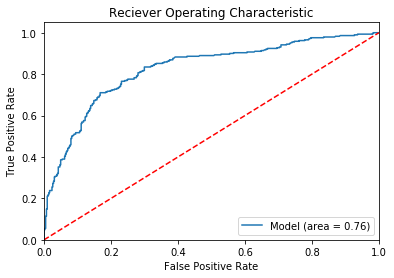

In [8]:
from sklearn.metrics import roc_auc_score, roc_curve, classification_report
import matplotlib.pyplot as plt

def ModelScore(y_true, y_pred,output):
    print('1= Survived', '0= Did Not Survive')
    print(classification_report(y_true, y_pred))
    roc_auc = roc_auc_score(y_true, y_pred)
    fpr, tpr, thresholds = roc_curve(y_true,output)
    plt.figure()
    plt.plot(fpr, tpr, label='Model (area = %.2f)'% roc_auc)
    plt.plot([0,1],[0,1], 'r--')
    plt.xlim([0.0,1.0])
    plt.ylim([0.0,1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Reciever Operating Characteristic')
    plt.legend(loc='lower right')
    plt.show()
    
ModelScore(train_outputs,out_r,outputs)

In [132]:
from ipywidgets import interactive
import ipywidgets as widgets

x = data['Sex'].values
y = data['Fare'].values
graph_weight = []
B = 0.5
for i in range(100):
    graph_weight.append(np.random.randint(-5,5,size=3)/np.random.randint(1,5,size=3))


errors = []
for i in range(100):
    pred = np.array(sigmoid(np.dot(input_layer,graph_weight[i]))).ravel()

    error = np.mean((pred - train_outputs)**2)
    errors.append(error)
    
    
errors = np.array(errors) 

x = [graph_weight[i][0] for i in range(100)]
y = [graph_weight[i][1] for i in range(100)]

from mpl_toolkits.mplot3d import Axes3D 
import matplotlib.cm as cm
def plot(ix,iy):
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(projection='3d')
    ax.plot_trisurf(x,y,errors,cmap=cm.magma)

    ax.view_init(iy,ix)
    ax.set_title('Loss Function for Single Layer Perceptron NN')
    ax.set_xlabel('Weight1 (multiplied by Sex)')
    ax.set_ylabel('Weight2 (multiplied by Age)')

inter_plot = interactive(plot,ix=widgets.FloatSlider(min=0,max=360,step=15,value=135),iy=widgets.FloatSlider(min=0,max=360,step=15,value=20))
inter_plot

interactive(children=(FloatSlider(value=135.0, description='ix', max=360.0, step=15.0), FloatSlider(value=20.0…

## Now Building NN Class with hidden relu activation layer 

In [129]:
class Relu:
    @staticmethod
    def activation(z):
        z[z<0] = 0
        return z
    @staticmethod
    def prime(z):
        z[z<0] = 0
        z[z>0] = 1
        return z
    
    
class Sigmoid:
    @staticmethod
    def activation(z):
        return 1 / (1+ np.exp(-z))
    @staticmethod
    def prime(z):
        return Sigmoid.activation(z) * (1 - Sigmoid.activation(z))

In [130]:
class NeuralNetwork():
    def __init__(self, dimensions, activations):
        #dimensions param: tuple of dimensions for NN, (input, hidden layer, output)
        #activations param: tuple of activation fuctions
        self.n_layers = len(dimensions)
        self.loss = None
        self.learning_rate = None
        
        self.w = {}
        self.b = {}
        self.activations = {}
        for i in range(len(dimensions) - 1):
            self.w[i+1] = np.random.randn(dimensions[i],dimensions[i+1]) / np.sqrt(dimensions[i])
            self.b[i+1] = 2 * np.random.random_sample(dimensions[i+1]) + 1
            self.activations[i+2] = activations[i]
            

    def _feed_forward(self, x):
        #param x: array of input data vectors( array of arrays )
        
        #pass data forward through NN
        #first iter z = 
        z = {}
        a = {1 : x}
        
        for i in range(1, self.n_layers):
            
            z[i+1] = np.dot(a[i], self.w[i]) + self.b[i]
            a[i+1] = self.activations[i+1].activation(z[i+1])
            
        return z, a
    
    def predict(self, x):
        #x param: array containing parameters
        _ , a = self._feed_forward(x)
        return a[self.n_layers]
        
    def _update_w_b(self, index, dw, delta):
        #index param: index of layer 
        #dw param: array of partial derivatives for weights 
        #delta param: delta error (combined partial dervatives for chain rule for partial der with respect to weights)
        self.w[index] -= self.learning_rate * dw 
        self.b[index] -= self.learning_rate * np.mean(delta, 0)
        
    def _back_prop(self, z, a , y_true):
        #z param: dictionary w(x) +b
        # a param: dict f(z)
        delta = self.loss.delta(y_true, a[self.n_layers])
        dw = np.dot(a[self.n_layers - 1].T, delta)
        
        update_params = {
            self.n_layers -1: (dw, delta)
        }
        
        for i in reversed(range(2,self.n_layers)):
            delta = np.dot(delta, self.w[i].T) * self.activations[i].prime(z[i])
            
        for k,v in update_params.items():
            self._update_w_b(k, v[0], v[1])
            
    def fit(self, x, y_true, loss, epochs, batch_size, learning_rate):
        if x.shape[0] != y_true.shape[0]:
            raise ValueError('Lengh of x and y arrays dont match')
        
        self.loss = loss(self.activations[self.n_layers])
        self.learning_rate = learning_rate
        
        for i in range(epochs):
            # Shuffle the data
            #stochastic gradient decent for faster processing
            #uses sample of points rather than full training set to calculate partial derivatives
            seed = np.arange(x.shape[0])
            np.random.shuffle(seed)
            x_ = x[seed]
            y_ = y_true[seed]
            
            for j in range(x.shape[0] // batch_size):
                #
                k = j * batch_size
                l = (j + 1) * batch_size
                z, a = self._feed_forward(x_[k:l])
                self._back_prop(z, a, y_[k:l])
            
            if (i + 1) % 25 == 0:
                _, a = self._feed_forward(x)
                print("Loss:", self.loss.loss(y_true, a[self.n_layers]))

        
        
class MSE:
    def __init__(self, activation_fn):
        #param activation_fn: Class object of activation function
        self.activation_fn = activation_fn
    def activation(self, z):
        return self.activation_fn.activation(z)

    @staticmethod
    def loss(y_true, y_pred):
        return np.mean((y_pred - y_true)**2)
    @staticmethod
    def prime(y_true, y_pred):
        #partial derrivative for chain rule
        return y_pred - y_true
        
    def delta(self, y_true, y_pred):
        #combining partial activation derivative and derivative of MSE with respect to y_pred
         return self.prime(y_true, y_pred) * self.activation_fn.prime(y_pred)

    
        
        
        


Loss: 0.24009831422344732
Loss: 0.20436733111930436
Loss: 0.18543344951620463
Loss: 0.17454886458259788
Loss: 0.1679285573366352
Loss: 0.16372249718803228
Loss: 0.16101535062286723
Loss: 0.15917103435406318
Loss: 0.15791003758134314
Loss: 0.15705934989104886
Loss: 0.15644760418552134
Loss: 0.15600551887649403
Loss: 0.15574943185594536
Loss: 0.15551569652540134
Loss: 0.15538191679006058
Loss: 0.15527672131374642
Loss: 0.15521029230689284
Loss: 0.15515216145328187
Loss: 0.1551303896715413
Loss: 0.15511181532435936
Loss: 0.15509846583831263
Loss: 0.15509137579440616
Loss: 0.15507903060927247
Loss: 0.15508361787291852
Loss: 0.15509017250746507
Loss: 0.15508549392047769
Loss: 0.15509453344218888
Loss: 0.1550934031749421
Loss: 0.15510557336490782
Loss: 0.15510681323402517
Loss: 0.15510508808319262
Loss: 0.15511068842734846
Loss: 0.1551149988875612
Loss: 0.15511535582852365
Loss: 0.15511733811815331
Loss: 0.15512206717238386
Loss: 0.1551202009000538
Loss: 0.1551229178545325
Loss: 0.1551257578

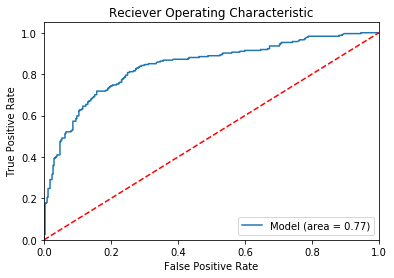

In [131]:
from sklearn.model_selection import train_test_split


x = inputs
y = train_outputs

X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=.2, random_state=42)



np.random.seed(1)


nn = NeuralNetwork((3, 4, 1), (Relu, Sigmoid))
nn.fit(X_train,y_train,loss=MSE,epochs=1000,batch_size=15,learning_rate=.001)
predictions = nn.predict(X_train)
y_pred = []
for i in predictions:
    if i >= 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)
        
        
        
ModelScore(y_train,y_pred,predictions)

In [80]:
#weights after training
#keys represent layers 
nn.w

{1: array([[ 0.93781623, -0.35319773, -0.3049401 , -0.61947872],
        [ 0.49964333, -1.32879399,  1.00736754, -0.43948301],
        [ 0.18419731, -0.14397405,  0.84414841, -1.18942279]]),
 2: array([[-2.49693685],
        [ 0.20181367],
        [ 0.94816911],
        [-0.4604523 ]])}

In [72]:

#bias terms 
nn.b

{1: array([1.28077388, 1.39620298, 2.60148914, 2.93652315]),
 2: array([2.91015284])}

In [74]:
#outputs from neurons 
#just the relu layer and the sigmoid layer
#z = x*w +b
z, a = nn._feed_forward(x)
z

{2: array([[1.85799663, 1.82248589, 1.32417048, 3.16742005],
        [1.69393094, 0.53674221, 3.76159666, 1.86225538],
        [1.06020922, 1.80769417, 1.9174676 , 3.65061624],
        ...,
        [0.89616461, 2.38835916, 1.78408028, 3.36602933],
        [2.07491677, 1.39439592, 1.96490876, 2.53462494],
        [2.20393241, 0.90574531, 2.02610706, 2.85342306]]),
 3: array([[-1.56425315],
        [ 1.49798618],
        [ 0.76484367],
        [ 1.27662598],
        [-1.8720683 ],
        [-1.3813331 ],
        [-0.84610554],
        [ 0.79228574],
        [ 1.42074297],
        [ 1.450308  ],
        [ 0.5142947 ],
        [-1.50190129],
        [-1.59348185],
        [ 1.0598271 ],
        [ 0.35572242],
        [-0.71533068],
        [ 0.8051263 ],
        [-1.58046473],
        [-1.76697614],
        [ 1.03799223],
        [-1.25338955],
        [ 1.42267009],
        [ 0.84986598],
        [ 1.51610636],
        [-1.67589878],
        [-2.15045728],
        [-0.49520727],
        [-

In [77]:
#activations of z f(z)
#outpluts from layers
#1 is the input layer so the given data
#2 is outputs from weights*x + B passed through relu function
a


{1: array([[ 1.        , -0.53037664, -0.51897787],
        [ 0.        ,  0.57183099,  0.69189675],
        [ 0.        , -0.25482473, -0.50621356],
        ...,
        [ 0.        , -0.73704057, -0.08877362],
        [ 1.        , -0.25482473, -0.08877362],
        [ 1.        ,  0.15850313, -0.50952283]]),
 2: array([[1.85799663, 1.82248589, 1.32417048, 3.16742005],
        [1.69393094, 0.53674221, 3.76159666, 1.86225538],
        [1.06020922, 1.80769417, 1.9174676 , 3.65061624],
        ...,
        [0.89616461, 2.38835916, 1.78408028, 3.36602933],
        [2.07491677, 1.39439592, 1.96490876, 2.53462494],
        [2.20393241, 0.90574531, 2.02610706, 2.85342306]]),
 3: array([[0.17303719],
        [0.81727393],
        [0.68240442],
        [0.7818749 ],
        [0.13330258],
        [0.20079498],
        [0.30025045],
        [0.68832191],
        [0.80545486],
        [0.81004583],
        [0.62581271],
        [0.18214212],
        [0.16889459],
        [0.7426575 ],
        [0.